# Evaluation Regression Model Exercises

### Import the required libraries (some libraries are imported in-line)

In [30]:
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.feature_selection import f_regression
from math import sqrt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import viz

from evaluate import get_tips_data, prep_tips, visualize_tips, visual_tip, get_clean_mpg_data

from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')


## Perform the initial examination of the data

In [3]:
tips = get_tips_data()
tips.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


## Examine the data 

In [4]:
# Check the summary structure
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [5]:
# Dtypes

tips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 15.2+ KB


In [6]:
# Shape of the data
tips.shape

(244, 7)

In [7]:
# Check missing values
tips.value_counts().isnull().sum()

0

## Clean and prepare the tips dataset

>- ### No splitting required for this dataset

In [8]:
clean_tips = prep_tips()
tips = clean_tips
tips.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [9]:
np.array(tips[['total_bill', 'tip']].to_numpy())

array([[16.99,  1.01],
       [10.34,  1.66],
       [21.01,  3.5 ],
       [23.68,  3.31],
       [24.59,  3.61],
       [25.29,  4.71],
       [ 8.77,  2.  ],
       [26.88,  3.12],
       [15.04,  1.96],
       [14.78,  3.23],
       [10.27,  1.71],
       [35.26,  5.  ],
       [15.42,  1.57],
       [18.43,  3.  ],
       [14.83,  3.02],
       [21.58,  3.92],
       [10.33,  1.67],
       [16.29,  3.71],
       [16.97,  3.5 ],
       [20.65,  3.35],
       [17.92,  4.08],
       [20.29,  2.75],
       [15.77,  2.23],
       [39.42,  7.58],
       [19.82,  3.18],
       [17.81,  2.34],
       [13.37,  2.  ],
       [12.69,  2.  ],
       [21.7 ,  4.3 ],
       [19.65,  3.  ],
       [ 9.55,  1.45],
       [18.35,  2.5 ],
       [15.06,  3.  ],
       [20.69,  2.45],
       [17.78,  3.27],
       [24.06,  3.6 ],
       [16.31,  2.  ],
       [16.93,  3.07],
       [18.69,  2.31],
       [31.27,  5.  ],
       [16.04,  2.24],
       [17.46,  2.54],
       [13.94,  3.06],
       [ 9.

In [10]:
# Reshape the array and rename the columns

tips_features = pd.DataFrame(np.array(tips[['total_bill', 'tip']].to_numpy()), columns = ['total_bill', 'tip'])
tips_features.head(3)

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50


In [11]:
# Map X, and y to features of interest and check lenght

X = tips_features['total_bill']
y = tips_features['tip']

## Visualize features of interest 

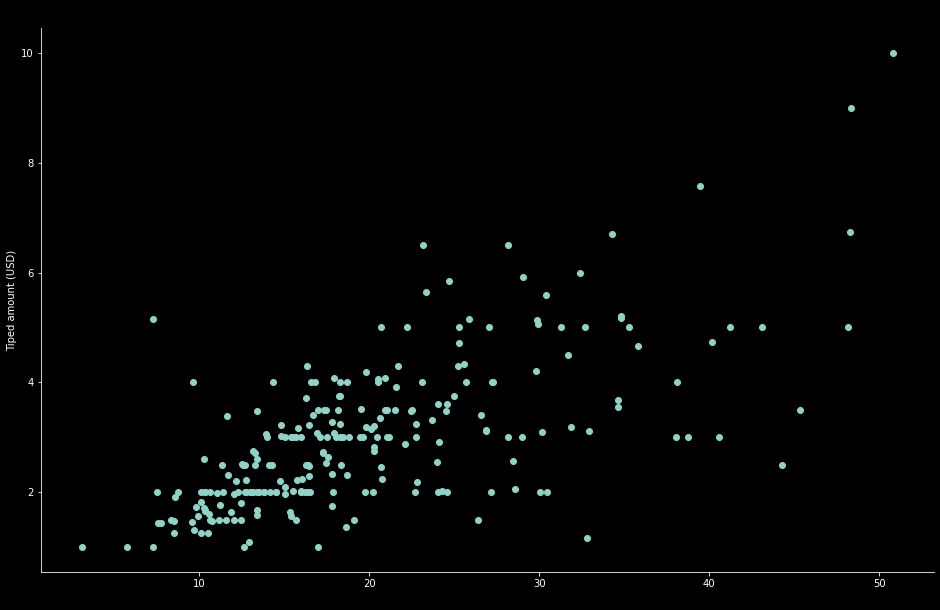

In [12]:
plt.figure(figsize = (16, 10))
plt.scatter(X, y)
plt.title('Scatter of tips vs total bill', color = 'black', weight = 'bold', size = 20)
plt.xlabel('Total Bill (USD)', size = 10, color = 'black')
plt.ylabel('Tiped amount (USD)')
plt.show()

## Take aways:
>- #### Total bill and tips are in the right data type (float)
>- #### The data contains no missing value

### 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

### Create a yhat baseline

In [13]:
tips_features['yhat_baseline'] = tips_features['tip'].mean()

In [14]:
tips_features.head()

,total_bill,tip,yhat_baseline
0,16.99,1.01,3.002387
1,10.34,1.66,3.002387
2,21.01,3.50,3.002387
3,23.68,3.31,3.002387
4,24.59,3.61,3.002387


### Build the model

In [15]:
# Import the required library
from sklearn.linear_model import LinearRegression

# Create the model
model = LinearRegression()

# Fit the model 
model.fit(tips_features[['total_bill']], tips_features.tip)

# compute predictions and add to original dataframe
tips_features['yhat_predicted'] = model.predict(tips_features[['total_bill']])

tips_features.head(3)


,total_bill,tip,yhat_baseline,yhat_predicted
0,16.99,1.01,3.002387,2.706097
1,10.34,1.66,3.002387,2.008358
2,21.01,3.50,3.002387,3.127889


### (3). Plot the residuals for the linear regression model that you made.



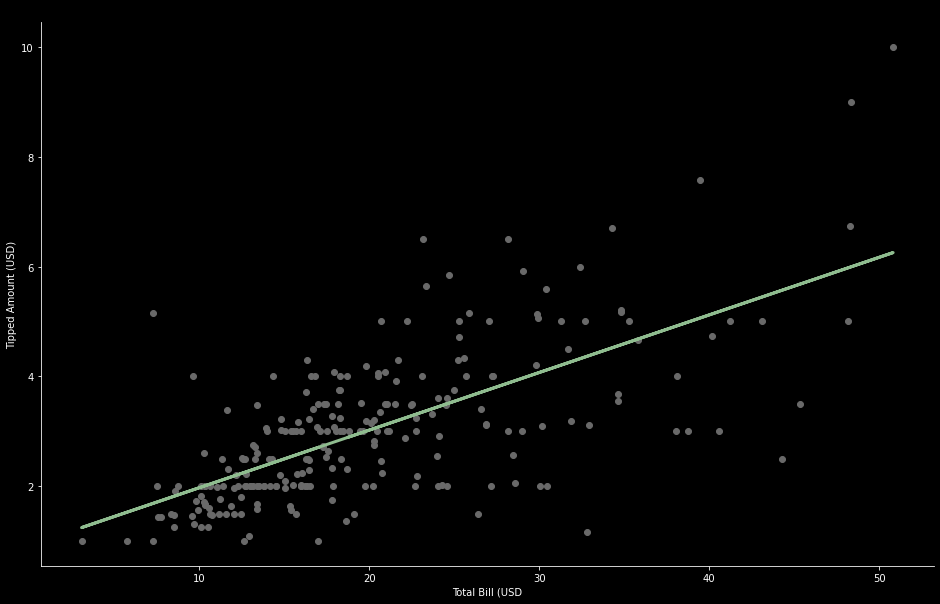

In [16]:
visual_tip(tips_features, X, y)

### (4). Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.


#### (i). Sum of Squared Errors (SSE) - Model

In [17]:
# Calculation of SSE using the Scikit method

SSE_model = mean_squared_error(tips_features.tip, tips_features.yhat_predicted) * len(tips_features)
SSE_model


252.70665040848206

#### (ii). Explained Sum of Squares (ESS) - Model


In [18]:
ESS_model = sum(tips_features.yhat_predicted - tips_features.tip.mean() ** 2)
ESS_model


-1460.9013843621408

#### (iii). Total Sum of Squares (TSS) - model

In [19]:
TSS_model = (ESS_model + SSE_model)
TSS_model


-1208.1947339536587

#### (iv). Mean Squared Error  (MSE) - model

In [20]:
MSE_model = mean_squared_error(tips_features.tip, tips_features.yhat_predicted)
MSE_model


1.0399450634093912

#### (v). Root Mean Squared Error (RMSE)

In [21]:
RMSE_model = sqrt(mean_squared_error(tips_features.tip, tips_features.yhat_predicted))
RMSE_model


1.0197769674832782

### (5). Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model(i.e. a model that always predicts the average tip amount).



(i). Sum of Squared Errors (SSE) - baseline


In [22]:
SSE_baseline = mean_squared_error(tips_features.tip, tips_features.yhat_baseline) * len(tips_features)
SSE_baseline


464.2118156378601

#### (ii). Explained Sum of Squares (ESS) - Baseline 

In [23]:
ESS_baseline = sum(tips_features.yhat_baseline - tips_features.tip.mean() ** 2)
ESS_baseline


-1460.9013843621321

#### (iii). Total Sum of Squares (TSS) - baseline

In [24]:
TSS_baseline = (ESS_baseline + SSE_baseline)
TSS_baseline

-996.689568724272

#### (iv). Mean Squared Error  (MSE) - baseline

In [25]:
MSE_baseline = mean_squared_error(tips_features.tip, tips_features.yhat_baseline)
MSE_baseline


1.9103366898677372

#### (v). Root Mean Squared Error (RMSE) - Baseline


In [26]:
RMSE_baseline = sqrt(mean_squared_error(tips_features.tip, tips_features.yhat_baseline))
RMSE_baseline


1.382149300859982

#### (6). Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [27]:
(SSE_baseline == SSE_model)

print(f'Baseline SSE: {SSE_baseline}\n\nModel SSE: {SSE_model}')

Baseline SSE: 464.2118156378601

Model SSE: 252.70665040848206


In [28]:
# Comprehensive with all the calculations

baseline = pd.DataFrame(np.array(['SSE_baseline', 'MSE_baseline', 'RMSE_baseline']), columns=['Baseline'])
modeled_prediction = pd.DataFrame(np.array(['SSE_model', 'MSE_model', 'RMSE_model']), columns=['Model_Prediction'])

baseline['Baseline_Error'] = np.array([SSE_baseline, MSE_baseline, RMSE_baseline])
modeled_prediction['Model_Error'] = np.array([SSE_model, MSE_model, RMSE_model])


print(f'{baseline}\n\n {modeled_prediction}')

        Baseline  Baseline_Error
0   SSE_baseline      464.211816
1   MSE_baseline        1.910337
2  RMSE_baseline        1.382149

   Model_Prediction  Model_Error
0        SSE_model   252.706650
1        MSE_model     1.039945
2       RMSE_model     1.019777


### (7). What is the amount of variance explained in your model?



In [29]:
baseline['Error_Delta'] = (modeled_prediction.Model_Error - baseline.Baseline_Error)

baseline


,Baseline,Baseline_Error,Error_Delta
0,SSE_baseline,464.211816,-211.505165
1,MSE_baseline,1.910337,-0.870392
2,RMSE_baseline,1.382149,-0.362372


### (8). Is your model better than the baseline model?

>- From the result in section #6 & #7 above the comparison of the model and the baseline, the model appears to perform better than the predicted modal. In section #6, SSE model is 252.71 and SSE baseline 464.21. A difference of almost half better with the model predicction. With MSE and RMSE the model outperforms the baseline too confirming the SSE figures.

### (9). Create a file named evaluate.py that contains the following functions.

>- plot_residuals(y, yhat): creates a residual plot

>- regression_errors(y, yhat): returns the following values:
>>- sum of squared errors (SSE)
>>- explained sum of squares (ESS)
>>- total sum of squares (TSS)
>>- mean squared error (MSE)
>>- root mean squared error (RMSE)

>- baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
>- better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

### (9). Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.

In [31]:
mpg = get_clean_mpg_data()
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
